In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet
import statsmodels.api as sm
import statsmodels.formula.api as smf
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#import requests
import json
import time
import Ames_Functions
import pickle
pd.set_option("display.max_columns", None)

In [7]:
df_house = pd.read_csv("df_RE_latlongs_v2.csv", index_col = 0).set_index("SaleID")
df_biz = pd.read_csv("df_EssentialLatLong_v2.csv")
df_min_distances = pd.read_csv("df_min_distances.csv", index_col = 0)

In [4]:
df_cross = df_house.join(df_biz, how = "cross", lsuffix = "_house", rsuffix = "_biz")
df_cross

,SaleID,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Ownr2,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,MA_Zip2,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,X1TPr_D,X1TSc_D,X2TPr_D,X2TSc_D,X1TPr_S,X1TSc_S,X2TPr_S,X2TSc_S,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,BldgType,YrBuilt,HouseStyle,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,ParclRel,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs,reverse_lookup_rd,Lat_house,Long_house,Name,Address,Service,Lat_biz,Long_biz,Label
0,2,5.204400e+08,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:16 \n AMES,5,45,GENESIS HOMES INC,NaN,750 SE ALICE'S RD,NaN,WAUKEE,IA,50263.0,NaN,2021.0,3.0,2021-02822,2021.0,3.0,WD,5700,0,0,5700,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,12493.0,Vac.Lot,0,0,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,2.0,78000.0,WRDConv,Normal,Deed,4507.0,NaN,EVEREST,AVE,NaN,NaN,NaN,31-Mar-22,Ames City Assessor,0.0,Everest Avenue,42.064191,-93.662310,Stephens Auditorium,"1900 Center Dr, Ames, IA 50011",Arts,42.020199,-93.638018,S_Auditorium
1,2,5.204400e+08,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:16 \n AMES,5,45,GENESIS HOMES INC,NaN,750 SE ALICE'S RD,NaN,WAUKEE,IA,50263.0,NaN,2021.0,3.0,2021-02822,2021.0,3.0,WD,5700,0,0,5700,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,12493.0,Vac.Lot,0,0,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,2.0,78000.0,WRDConv,Normal,Deed,4507.0,NaN,EVEREST,AVE,NaN,NaN,NaN,31-Mar-22,Ames City Assessor,0.0,Everest Avenue,42.064191,-93.662310,Brunnier Art Museum,"Scheman Bldg, 295, 1800 Center Dr, Ames, IA 50011",Arts,42.021477,-93.636299,Brun_Art
2,2,5.204400e+08,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:16 \n AMES,5,45,GENESIS HOMES INC,NaN,750 SE ALICE'S RD,NaN,WAUKEE,IA,50263.0,NaN,2021.0,3.0,2021-02822,2021.0,3.0,WD,5700,0,0,5700,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,12493.0,Vac.Lot,0,0,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,2.0,78000.0,WRDConv,Normal,Deed,4507.0,NaN,EVEREST,AVE,NaN,NaN,NaN,31-Mar-22,Ames City Assessor,0.0,Everest Avenue,42.064191,-93.662310,Octagon Center For the Arts,"427 Douglas Ave, Ames, IA 50010",Arts,42.025416,-93.612190,Oct_Art
3,2,5.204400e+08,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:16 \n AMES,5,45,GENESIS HOMES INC,NaN,750 SE ALICE'S RD,NaN,WAUKEE,IA,50263.0,NaN,2021.0,3.0,2021-02822,2021.0,3.0,WD,5700,0,0,5700,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,12493.0,Vac.Lot,0,0,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,2.0,78000.0,WRDConv,Normal,Deed,4507.0,NaN,EVEREST,AVE,NaN,NaN,NaN,31-Mar-22,Ames City Assessor,0.0,Everest Avenue,42.064191,-93.662310,St. Cecilia Elementary School,"2900 HOOVER AVE, AMES, IA 50010",Elem_School,42.049819,-93.630113,St_C_School
4,2,5.204400e+08,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:16 \n AMES,5,45,GENESIS HOMES INC,NaN,750 SE ALICE'S RD,NaN,WAUKEE,IA,50263.0,NaN,

In [98]:
df_cross["dist"] = df_cross.apply(lambda x: get_dist(np.array([x.Lat_house, x.Long_house]), np.array([x.Lat_biz, x.Long_biz])), axis = 1)
#df_cross.to_csv("df_cross.csv")

## Finding differences in two different variables for feature engineering
## (SKIP)

In [439]:
# (df_driv_final["from_time"]
#     .eval("HS_Lib_diff = abs(High_School - Library)")
#     .eval("SV_Rest_diff = abs(Sports_Venue - Restaurant)")
#     .eval("Mov_Rest_diff = abs(Movies-Restaurant)")
#     .eval("Park_Rec_diff = abs(Park - Recreation)")
#     .eval("Groc_Shop_diff = abs(Organic_Groceries - Shopping)")
# ).filter(regex = "diff$").corr()
# #Possible ratios to consider:
# #High_School/Library
# #Sports_Venue/Restaurant
# #Movies/Restaurant
# #Park/Recreation
# #Organic_Groceries/Shopping
# #ISU/Library


,HS_Lib_diff,SV_Rest_diff,Mov_Rest_diff,Park_Rec_diff,Groc_Shop_diff
HS_Lib_diff,1.000000,-0.727417,-0.547363,-0.152308,-0.219560
SV_Rest_diff,-0.727417,1.000000,0.848838,-0.122952,0.397418
Mov_Rest_diff,-0.547363,0.848838,1.000000,-0.274410,0.370700
Park_Rec_diff,-0.152308,-0.122952,-0.274410,1.000000,-0.468057
Groc_Shop_diff,-0.219560,0.397418,0.370700,-0.468057,1.000000


## Finding ratios of distances from two different services for feature engineering 
## (SKIP)

In [652]:
#Possible ratios to consider:
#High_School/Library
#Sports_Venue/Restaurant
#Movies/Restaurant
#Park/Recreation
#Organic_Groceries/Shopping
#ISU/Library

ratio_dict = {}

for a, b in [("High_School", "Library"), ("Sports_Venue", "Restaurant"), ("Movies", "Restaurant"), ("Park", "Recreation"), ("Organic_Groceries", "Shopping"), ("ISU", "Library")]:
      ratio_dict[f"{a}_{b}_ratio"] = (df_driv_final["from_time"]
                                                .apply(lambda x: x[a]/x[b] if x[a] > x[b] else x[b]/x[a], axis = 1)
                                                .rename(f"{a}_{b}_ratio")
                                    )

pd.DataFrame(ratio_dict).join(df_driv_final["from_time"].SalePrice)

,High_School_Library_ratio,Sports_Venue_Restaurant_ratio,Movies_Restaurant_ratio,Park_Recreation_ratio,Organic_Groceries_Shopping_ratio,ISU_Library_ratio,SalePrice
SaleID,,,,,,,
2,1.201318,2.804738,2.791816,1.018666,1.573722,1.159183,78000.0
3,1.201318,2.804738,2.791816,1.018666,1.573722,1.159183,408905.0
18,1.197453,2.743412,2.730929,1.018309,1.553475,1.156232,434066.0
19,1.196223,2.724280,2.711934,1.018196,1.547170,1.155292,88000.0
20,1.194971,2.704985,2.692777,1.018080,1.540816,1.154335,88000.0
...,...,...,...,...,...,...,...
22743,1.736798,1.551261,1.102166,1.041003,1.440054,1.712640,220000.0
22749,1.682007,1.504043,1.092605,1.038153,1.401589,1.659646,217500.0
22756,1.650223,1.477176,1.087238,1.036486,1.379769,1.628904,229000.0


,High_School_Library_ratio,Movies_Restaurant_ratio,Park_Recreation_ratio,Organic_Groceries_Shopping_ratio,SalePrice
count,633.000000,633.000000,633.000000,633.000000,633.000000
mean,1.871164,2.261580,1.854632,1.753430,258405.135861
std,1.141163,1.649165,1.275390,4.805657,115168.322605
min,1.008700,1.025022,1.006927,1.000375,900.000000
25%,1.218229,1.257753,1.146691,1.116350,178000.000000
50%,1.620682,1.804717,1.460281,1.277386,235000.000000
75%,1.970919,2.626854,2.018857,1.635124,317000.000000
max,9.871036,16.950000,20.845070,119.346154,793000.000000


Field correlation with SalePrice
SalePrice                           1.000000
Movies_Restaurant_ratio             0.113682
Organic_Groceries_Shopping_ratio   -0.015039
High_School_Library_ratio          -0.096507
Park_Recreation_ratio              -0.257756
Name: SalePrice, dtype: float64
------------------------------

Random Forest Feature Importances
                               Name Importance
2             Park_Recreation_ratio    0.34276
1           Movies_Restaurant_ratio   0.231822
0         High_School_Library_ratio   0.223835
3  Organic_Groceries_Shopping_ratio   0.201583
------------------------------

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     14.17
Date:                Fri, 16 Jun 2023   Prob (F-statistic):  

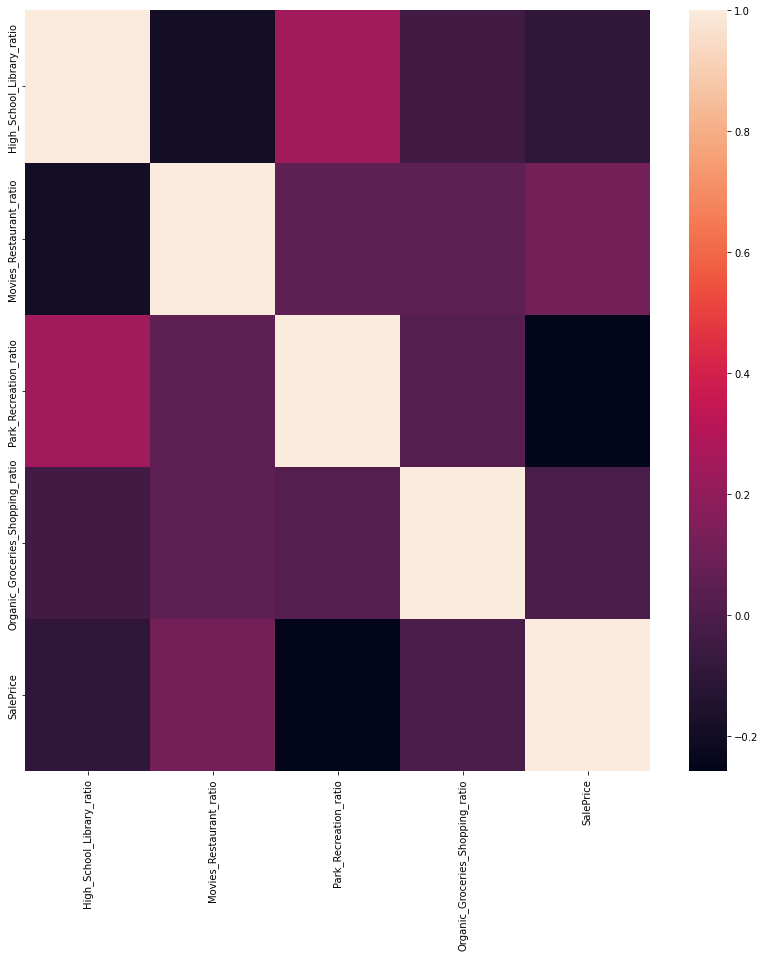

In [666]:
EDA_report(pd.DataFrame(ratio_dict).drop(["Sports_Venue_Restaurant_ratio", "ISU_Library_ratio"], axis = 1).join(df_driv_final["from_time"].SalePrice))

In [665]:
get_vif(pd.DataFrame(ratio_dict).drop(["Sports_Venue_Restaurant_ratio", "ISU_Library_ratio"], axis = 1))

[2.6474191730790873,
 2.0026501116710853,
 2.9995764720823432,
 1.1216954870182765]

## Lasso feature selection section using lassoCV

In [856]:
#checking VIF for all df_driv_final variables
get_vif(df_driv_final["from_time"].iloc[:, :-1])

[152376498.12483937,
 152292807.44169673,
 679.3085768360327,
 160.17398976689768,
 91.0941144354468,
 44.48571988766489,
 214.88551122163184,
 935.0641192797292,
 530.7865965051614,
 648.6202043552847,
 879.491491116231,
 758.757370533543,
 77.93696127942407,
 231.5678891133568,
 160.80644208362818,
 40.92601439334196,
 141.47199219610772,
 350.30094526068194,
 266.4254679443283,
 1340.9908902655518]

In [398]:
X_lassoCV = {}
y_lassoCV = {}
X_lassoCV["from_time"] = df_driv_final["from_time"].drop("SalePrice", axis = 1)
y_lassoCV["from_time"] = df_driv_final["from_time"].SalePrice

In [409]:
lassoCV = LassoCV(normalize = True)
lassoCV.fit(X_lassoCV["from_time"], y_lassoCV["from_time"])
lassoCV.feature_names_in_[np.where(lassoCV.coef_ != 0)]

/Users/lelandmurrin/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


array(['Lat_house', 'Movies', 'Park', 'Recreation', 'Spa'], dtype=object)

In [ ]:
#checking VIF for only the lassoCV selected features in df_driv_final
lassoCV_coefs = {}

lassoCV_coefs["from_time"] = df_driv_final["from_time"][lassoCV.feature_names_in_[np.where(lassoCV.coef_ != 0)]]
lassoCV_coefs["from_time"].corr()

#get_vif(lassoCV_coefs["from_time"])

,Lat_house,Movies,Park,Recreation,Spa
Lat_house,1.000000,0.574386,0.114682,0.045949,-0.037722
Movies,0.574386,1.000000,0.563701,0.699062,0.537828
Park,0.114682,0.563701,1.000000,0.541209,0.569881
Recreation,0.045949,0.699062,0.541209,1.000000,0.930184
Spa,-0.037722,0.537828,0.569881,0.930184,1.000000


## Find Homes that had all businesses nearby vs all homes that had businesses far away
## (SKIP)

In [522]:
#mean_shop = np.mean(df_driv_final["from_time"][["Shopping"]])[0]
df_nearby = (df_driv_final["from_time"]
    .drop(["Lat_house", "Long_house", "SalePrice"], axis = 1)[df_driv_final["from_time"].drop(["Lat_house", "Long_house", "SalePrice"], axis = 1).transform(lambda x: x < x.mean())]
    .dropna()
    #.isnull()
    #.sum(axis = 0)
    #.sort_values(ascending = False)
) #.plot.hist(alpha = 0.3) #.corr()

df_far = (df_driv_final["from_time"]
    .drop(["Lat_house", "Long_house", "SalePrice"], axis = 1)[df_driv_final["from_time"].drop(["Lat_house", "Long_house", "SalePrice"], axis = 1).transform(lambda x: x > x.mean())]
    .dropna()
    #.isnull()
    #.sum(axis = 0)
    #.sort_values(ascending = False)
) #.plot.hist(alpha = 0.3) #.corr()
df_far.corr().Library #Library, Elem, 

Arts                 1.000000
Elem_School         -0.072957
Golf                -0.072957
Gym                  0.996288
High_School         -0.072957
Historic             0.212780
ISU                  0.324654
Library              1.000000
Medical             -0.000541
Movies               0.996659
Organic_Groceries   -0.072957
Park                 0.996659
Recreation           0.998420
Religion             1.000000
Restaurant          -0.072957
Shopping            -0.072957
Spa                  1.000000
Sports_Venue         0.996659
Name: Library, dtype: float64

In [525]:
get_vif(df_far[["Library", "Historic"]])

[94.77171340563096, 94.77171340563096]

## Creating feature for average distance of closest 5 services to each house record

In [613]:
df_closest = {}

for i in [1, 5, 10, 15]:
    df_closest[f"Closest_{i}"] = (df_driv_final["from_time"]
        .drop(["Lat_house", "Long_house", "SalePrice"], axis = 1)
        .stack()
        .reset_index()
        .set_axis(["SaleID", "Service", "driv_time"], axis = 1)
        .sort_values("driv_time")
        .groupby("SaleID")
        .head(i)
        .sort_values(["SaleID", "driv_time"])
        .groupby("SaleID")
        .driv_time
        .mean()
        #[["driv_time"]]
        #.mean().driv_time
    )

pd.DataFrame(df_closest)#.join(df_driv_final["from_time"].SalePrice)

,Closest_1,Closest_5,Closest_10,Closest_15
SaleID,,,,
2,85.5,210.28,324.33,403.220000
3,85.5,210.28,324.33,403.220000
18,95.3,220.08,334.13,413.020000
19,98.5,223.28,337.33,416.220000
20,101.8,226.58,340.63,419.520000
...,...,...,...,...
22743,276.6,295.28,333.13,363.680000
22749,305.2,323.88,361.73,392.280000
22756,324.0,342.68,380.53,411.080000


In [877]:
selected_features_dict = {}
selected_features_dict["Closest_5_feature"] = df_closest['Closest_5']

,Closest_1,SalePrice
count,633.000000,633.000000
mean,146.818799,258405.135861
std,84.844802,115168.322605
min,1.300000,900.000000
25%,83.500000,178000.000000
50%,118.000000,235000.000000
75%,203.800000,317000.000000
max,371.800000,793000.000000


Field correlation with SalePrice
SalePrice    1.000000
Closest_1    0.190147
Name: SalePrice, dtype: float64
------------------------------

Random Forest Feature Importances
        Name Importance
0  Closest_1        1.0
------------------------------

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     23.67
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           1.45e-06
Time:                        16:55:59   Log-Likelihood:                -8263.1
No. Observations:                 633   AIC:                         1.653e+04
Df Residuals:                     631   BIC:                         1.654e+04
Df Model:                           1                                         
Covariance Type:            nonrob

,Closest_5,SalePrice
count,633.000000,633.000000
mean,216.309131,258405.135861
std,99.695220,115168.322605
min,20.880000,900.000000
25%,136.700000,178000.000000
50%,201.840000,235000.000000
75%,297.360000,317000.000000
max,456.500000,793000.000000


Field correlation with SalePrice
SalePrice    1.000000
Closest_5    0.262897
Name: SalePrice, dtype: float64
------------------------------

Random Forest Feature Importances
        Name Importance
0  Closest_5        1.0
------------------------------

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     46.85
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           1.82e-11
Time:                        16:55:59   Log-Likelihood:                -8252.1
No. Observations:                 633   AIC:                         1.651e+04
Df Residuals:                     631   BIC:                         1.652e+04
Df Model:                           1                                         
Covariance Type:            nonrob

,Closest_10,SalePrice
count,633.000000,633.000000
mean,269.608167,258405.135861
std,111.015770,115168.322605
min,47.680000,900.000000
25%,175.420000,178000.000000
50%,269.110000,235000.000000
75%,354.600000,317000.000000
max,533.470000,793000.000000


Field correlation with SalePrice
SalePrice     1.00000
Closest_10    0.31523
Name: SalePrice, dtype: float64
------------------------------

Random Forest Feature Importances
         Name Importance
0  Closest_10        1.0
------------------------------

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     69.62
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           4.53e-16
Time:                        16:55:59   Log-Likelihood:                -8241.6
No. Observations:                 633   AIC:                         1.649e+04
Df Residuals:                     631   BIC:                         1.650e+04
Df Model:                           1                                         
Covariance Type:            nonr

,Closest_15,SalePrice
count,633.000000,633.000000
mean,318.602665,258405.135861
std,116.822033,115168.322605
min,102.893333,900.000000
25%,213.113333,178000.000000
50%,318.920000,235000.000000
75%,405.180000,317000.000000
max,602.353333,793000.000000


Field correlation with SalePrice
SalePrice     1.000000
Closest_15    0.332214
Name: SalePrice, dtype: float64
------------------------------

Random Forest Feature Importances
         Name Importance
0  Closest_15        1.0
------------------------------

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     78.28
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           8.94e-18
Time:                        16:55:59   Log-Likelihood:                -8237.8
No. Observations:                 633   AIC:                         1.648e+04
Df Residuals:                     631   BIC:                         1.649e+04
Df Model:                           1                                         
Covariance Type:            no

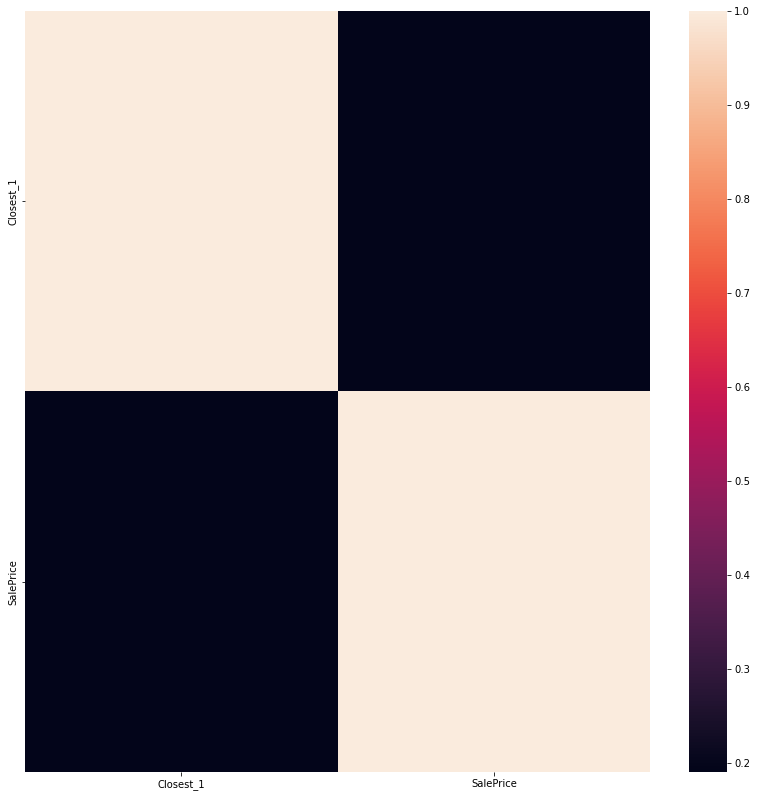

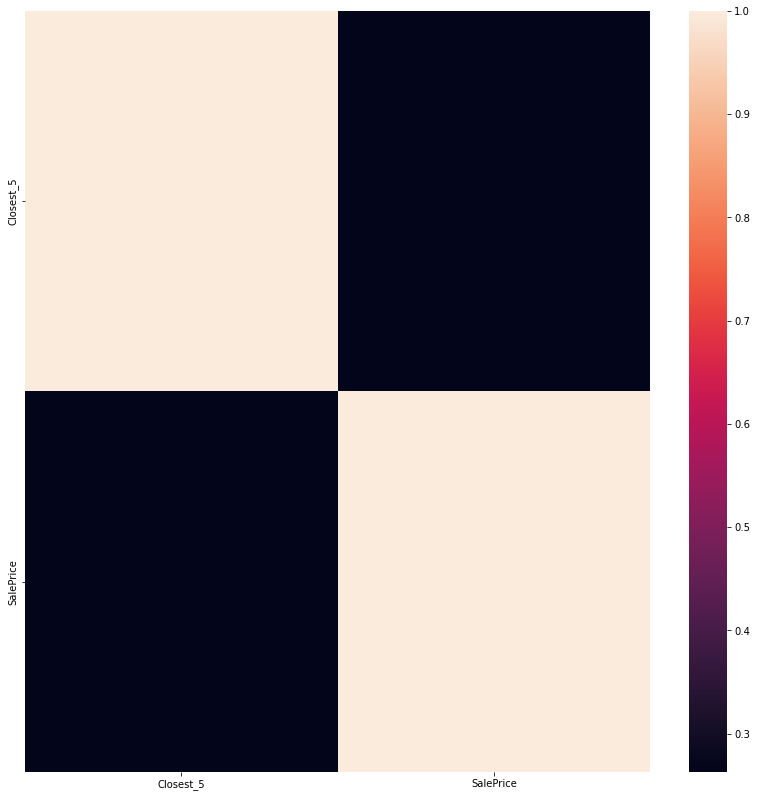

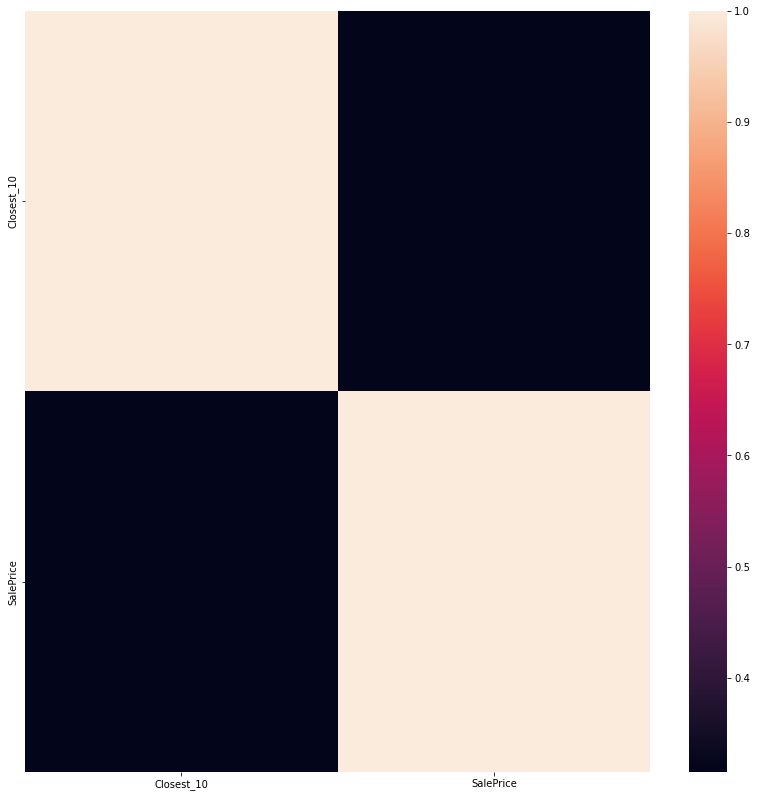

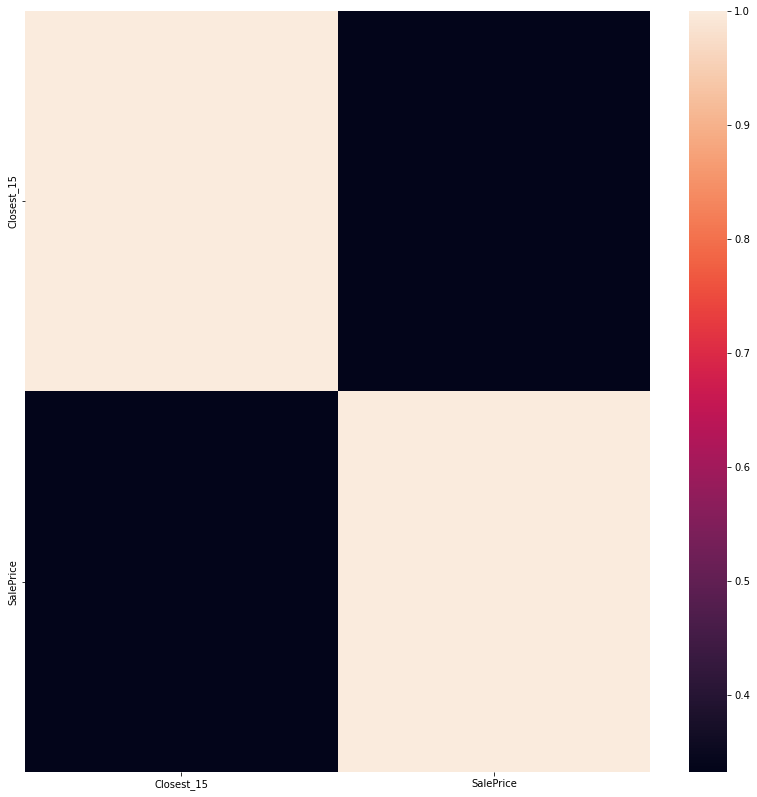

In [875]:
#Checking EDA report for each closest 1,5,10,15 businesses to a home
for i in [1,5,10,15]:
    EDA_report(pd.DataFrame(df_closest)[[f"Closest_{i}"]].join(df_driv_final["from_time"].SalePrice))

## Convenience Measurement Section (average proximity to all closest services)

In [883]:
s_convenience = (df_driv_final["from_time"]
        .drop(["Lat_house", "Long_house", "SalePrice"], axis = 1)
        .stack()
        .reset_index()
        .set_axis(["SaleID", "Service", "driv_time"], axis = 1)
        .sort_values("driv_time")
        .groupby("SaleID")
        .driv_time
        .mean()
        .sort_values()
        .rename("Closest_all")
        # .groupby("SaleID")
        # .driv_time
        # .mean()
    )

pd.DataFrame(s_convenience).join(df_driv_final["from_time"].SalePrice)

,Closest_all,SalePrice
SaleID,,
9379,134.555556,199000.0
8302,137.072222,175500.0
9371,139.594444,205000.0
8227,143.994444,157500.0
9382,144.144444,175000.0
...,...,...
11354,618.622222,447000.0
11336,620.538889,358000.0
11334,621.338889,375000.0


,Closest_all,Closest_1,Closest_5,Closest_10,Closest_15,SalePrice
count,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000
mean,356.660102,146.818799,216.309131,269.608167,318.602665,258405.135861
std,118.338210,84.844802,99.695220,111.015770,116.822033,115168.322605
min,134.555556,1.300000,20.880000,47.680000,102.893333,900.000000
25%,250.172222,83.500000,136.700000,175.420000,213.113333,178000.000000
50%,360.616667,118.000000,201.840000,269.110000,318.920000,235000.000000
75%,447.522222,203.800000,297.360000,354.600000,405.180000,317000.000000
max,640.238889,371.800000,456.500000,533.470000,602.353333,793000.000000


Field correlation with SalePrice
SalePrice      1.000000
Closest_all    0.345661
Closest_15     0.332214
Closest_10     0.315230
Closest_5      0.262897
Closest_1      0.190147
Name: SalePrice, dtype: float64
------------------------------

Random Forest Feature Importances
          Name Importance
0  Closest_all   0.286193
3   Closest_10   0.205374
1    Closest_1    0.17517
2    Closest_5   0.170543
4   Closest_15   0.162719
------------------------------

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     25.70
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           1.25e-23
Time:                        15:21:06   Log-Likelihood:                -8215.8
No. Observations:                 633   AIC:                   

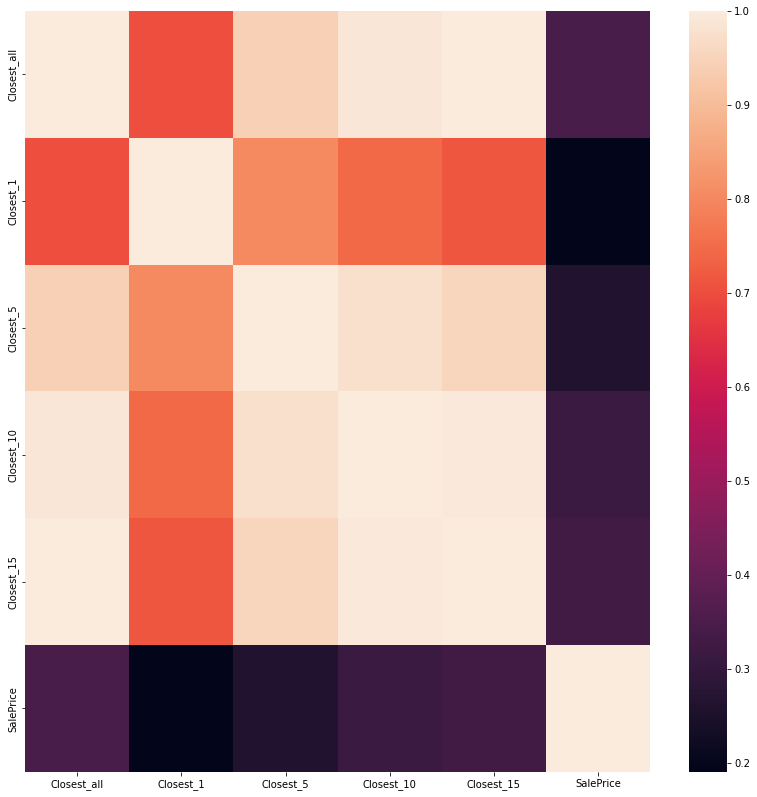

In [886]:
EDA_report(pd.DataFrame(s_convenience).join(pd.DataFrame(df_closest)).join(df_driv_final["from_time"].SalePrice))

In [890]:
get_vif(pd.DataFrame(df_central).join(pd.DataFrame(df_closest["Closest_1"].rename("Closest_1"))))

[7.650401862528, 7.650401862528]

In [899]:
selected_features_dict["Closest_all_feature"] = s_convenience
selected_features_dict

{'Closest_5_feature': SaleID
 2        210.28
 3        210.28
 18       220.08
 19       223.28
 20       226.58
           ...  
 22743    295.28
 22749    323.88
 22756    342.68
 22768    343.58
 22888    309.58
 Name: driv_time, Length: 633, dtype: float64,
 'Closest_all_feature': SaleID
 9379     134.555556
 8302     137.072222
 9371     139.594444
 8227     143.994444
 9382     144.144444
             ...    
 11354    618.622222
 11336    620.538889
 11334    621.338889
 11331    621.938889
 11368    640.238889
 Name: Closest_all, Length: 633, dtype: float64}

## Centrality Measurement Section (Proximity to Historic Service which contains City Hall and Old Town Historic District)

In [910]:
selected_features_dict["Central_historic_feature"] = df_driv_final["from_time"].Historic

dict_keys(['Closest_5_feature', 'Closest_all_feature', 'Central_historic_feature'])

## Count Number of Businesses within 1 minute of each house section

In [913]:
num_biz_dict = {}

for i in np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])*60:
    num_biz_dict[f"biz_{i}_secs"] = (df_driv_final["from_time"]
        .drop(["Lat_house", "Long_house", "SalePrice"], axis = 1)
        .stack()
        .reset_index()
        .set_axis(["SaleID", "Service", "driv_time"], axis = 1)
        .groupby("SaleID")
        .driv_time
        .apply(lambda x: (x <= i).sum())
        .rename("count")
        #.where(lambda x: x <= i)
        # .query(f"driv_time <= {i}")
        # .SaleID
        # .value_counts()
        #.sort_values("driv_time")
        #.filter(lambda x: x.driv_time <= i)
        # .head(i)
        # .sort_values(["SaleID", "driv_time"])
        # .groupby("SaleID")
        # .driv_time
        # .mean()
    )

pd.DataFrame(num_biz_dict).join(df_driv_final["from_time"].SalePrice)

,biz_60_secs,biz_120_secs,biz_180_secs,biz_240_secs,biz_300_secs,biz_360_secs,biz_420_secs,biz_480_secs,biz_540_secs,biz_600_secs,SalePrice
SaleID,,,,,,,,,,,
2,0,1,2,2,5,6,6,8,12,13,78000.0
3,0,1,2,2,5,6,6,8,12,13,408905.0
18,0,1,2,2,5,6,6,8,12,13,434066.0
19,0,1,2,2,4,6,6,8,12,13,88000.0
20,0,1,2,2,4,6,6,8,12,13,88000.0
...,...,...,...,...,...,...,...,...,...,...,...
22743,0,0,0,0,3,7,13,15,15,16,220000.0
22749,0,0,0,0,0,5,10,14,15,16,217500.0
22756,0,0,0,0,0,4,7,14,15,15,229000.0


,biz_60_secs,biz_120_secs,biz_180_secs,biz_240_secs,biz_300_secs,biz_360_secs,biz_420_secs,biz_480_secs,biz_540_secs,biz_600_secs,SalePrice
count,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000
mean,0.206951,1.412322,3.227488,5.164297,7.393365,9.448657,11.562401,13.548183,15.096367,16.293839,258405.135861
std,0.799416,2.327391,3.645537,4.693942,5.416958,5.640409,5.230719,4.291731,3.212200,2.328057,115168.322605
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,6.000000,7.000000,900.000000
25%,0.000000,0.000000,0.000000,1.000000,2.000000,5.000000,7.000000,10.000000,13.000000,15.000000,178000.000000
50%,0.000000,1.000000,2.000000,4.000000,6.000000,9.000000,12.000000,15.000000,16.000000,17.000000,235000.000000
75%,0.000000,2.000000,5.000000,9.000000,13.000000,15.000000,17.000000,17.000000,18.000000,18.000000,317000.000000
max,6.000000,11.000000,13.000000,16.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,793000.000000


Field correlation with SalePrice
SalePrice       1.000000
biz_60_secs    -0.102844
biz_120_secs   -0.254867
biz_300_secs   -0.293965
biz_600_secs   -0.300373
biz_540_secs   -0.300436
biz_240_secs   -0.300663
biz_420_secs   -0.310708
biz_360_secs   -0.311504
biz_480_secs   -0.322112
biz_180_secs   -0.327461
Name: SalePrice, dtype: float64
------------------------------

Random Forest Feature Importances
           Name Importance
9  biz_600_secs   0.255216
6  biz_420_secs   0.116605
7  biz_480_secs   0.109098
4  biz_300_secs   0.101084
5  biz_360_secs   0.099381
3  biz_240_secs   0.095274
8  biz_540_secs   0.091157
2  biz_180_secs   0.073131
1  biz_120_secs   0.044686
0   biz_60_secs    0.01437
------------------------------

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Leas

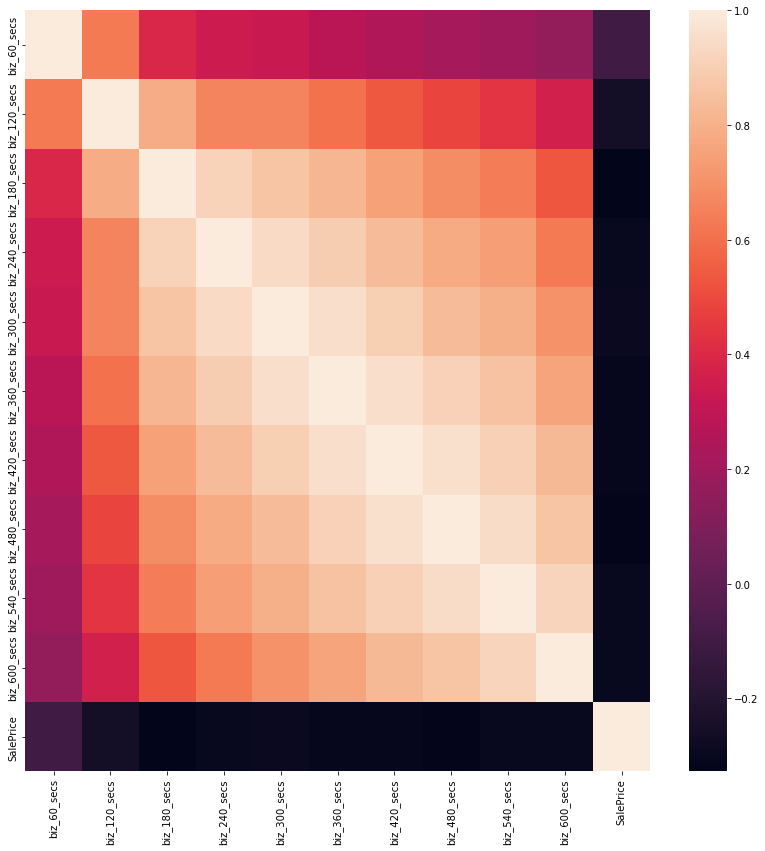

In [914]:
EDA_report(pd.DataFrame(num_biz_dict).join(df_driv_final["from_time"].SalePrice))

<AxesSubplot:ylabel='Frequency'>

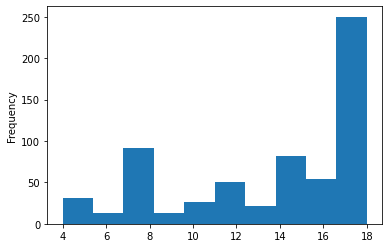

In [933]:
pd.DataFrame(num_biz_dict).biz_480_secs.plot.hist()

In [920]:
get_vif(pd.DataFrame(num_biz_dict)[["biz_180_secs", "biz_480_secs"]])

[2.6345201515612775, 2.6345201515612775]

In [935]:
selected_features_dict["num_biz_180s_feature"], selected_features_dict["num_biz_480s_feature"] = num_biz_dict["biz_180_secs"], num_biz_dict["biz_480_secs"]
selected_features_dict.keys()

dict_keys(['Closest_5_feature', 'Closest_all_feature', 'Central_historic_feature', 'num_biz_180s_feature', 'num_biz_480s_feature'])

In [740]:
#mean driving time in minutes for all businesses
df_driv_final["from_time"].drop(["Lat_house", "Long_house", "SalePrice"], axis = 1).describe().T['mean'].mean()/60

5.944335030132818

In [937]:
pickle.dump(selected_features_dict, open("selected_features_dict.pkl", 'wb'))

## Count the number of houses around each service

In [826]:
num_house_dict = {}

for s in np.array([2, 3, 4])*60:
    num_house_dict[f"house_{s}_secs"] = (df_driv_final["from_time"]
        .drop(["Lat_house", "Long_house", "SalePrice"], axis = 1)
        .stack()
        .reset_index()
        .set_axis(["SaleID", "Service", "driv_time_secs"], axis = 1)
        .groupby('Service')
        .apply(lambda x: x[x.driv_time_secs < s].driv_time_secs.count())
    )

pd.DataFrame(num_house_dict).join(df_biz.Service.value_counts().rename("Service_count")).apply(lambda x: round(x/x.Service_count, 2), axis = 1).drop("Service_count", axis = 1)

,house_120_secs,house_180_secs,house_240_secs
Service,,,
Arts,17.67,43.00,64.33
Elem_School,23.50,49.50,111.00
Golf,1.33,16.33,33.00
Gym,27.25,52.75,81.00
High_School,2.00,28.00,110.00
Historic,29.00,58.00,80.50
ISU,0.00,3.00,64.00
Library,38.00,81.00,114.00
Medical,74.00,129.00,175.00


In [813]:
mean_SalePrice = {}

for s in np.array([2, 3, 4])*60:
    mean_SalePrice[f"mean_salePrice_{s}_secs"] = (df_driv_final["from_time"]
        .drop(["Lat_house", "Long_house"], axis = 1)
        .set_index("SalePrice")
        .stack()
        .reset_index()
        .set_axis(["SalePrice", "Service", "driv_time_secs"], axis = 1)
        .groupby('Service')
        .apply(lambda x: x[x.driv_time_secs < s].SalePrice.mean())
        .transform(round, ndigits = 2)
    )

pd.DataFrame(mean_SalePrice).sort_values(by = "mean_salePrice_120_secs")

,mean_salePrice_120_secs,mean_salePrice_180_secs,mean_salePrice_240_secs
Service,,,
High_School,147375.00,213282.14,206375.00
Historic,166041.12,184953.67,196863.83
Medical,178680.08,186369.58,200287.29
Recreation,184346.26,188721.04,202233.86
Spa,191721.71,208934.29,212455.78
Organic_Groceries,202259.42,212034.15,240566.40
Shopping,204111.48,200157.49,208839.61
Library,215477.43,204664.55,207509.27
Arts,218552.83,202680.42,213048.71


In [832]:
df_nearby_houses = (pd.DataFrame(mean_SalePrice)
    .join(pd.DataFrame(num_house_dict)
          .join(df_biz.Service.value_counts().rename("Service_count"))
          .apply(lambda x: round(x/x.Service_count, 2), axis = 1)
          .drop("Service_count", axis = 1))
    .sort_values('mean_salePrice_120_secs')
)

In [837]:
get_vif(df_nearby_houses.dropna()[["mean_salePrice_120_secs", "house_120_secs"]])

[1.697142040569102, 1.697142040569102]

In [820]:
df_biz.Service.value_counts().rename("Service_count")

Gym                  4
Religion             4
Recreation           4
Arts                 3
Golf                 3
Restaurant           3
Spa                  3
Park                 2
Shopping             2
Organic_Groceries    2
Elem_School          2
Library              2
Historic             2
Medical              1
ISU                  1
Sports_Venue         1
High_School          1
Movies               1
Name: Service_count, dtype: int64

## Real Estate Dataset Feature Engineering

Adding fields: TotalArea and TotalArea_Gar

In [18]:
df_house = df_house.eval("TotalArea = GLA + TtlBsmtSF	").eval("TotalArea_Gar = GLA + TtlBsmtSF	+ GarageArea")
#df_RE_latlong.eval("TotalArea_Gar = GLA + TtlBsmtSF	+ GarageArea_RE", inplace = True)
df_house#.filter(regex = "Area|SF|GLA")

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,ClassSc_S,Legal_Pr,SchD_S,TxD_S,MA_Ownr1,MA_Ownr2,MA_Line1,MA_Line2,MA_City,MA_State,MA_Zip1,MA_Zip2,Rcrd_Yr,Rcrd_Mo,Inst1_No,Inst1_Yr,Inst1_Mo,Inst1TPr,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,X1TPr_D,X1TSc_D,X2TPr_D,X2TSc_D,X1TPr_S,X1TSc_S,X2TPr_S,X2TSc_S,LndAcX1S,ImpAcX1S,ImpAcX2S,HSTtl_D,MilVal_D,HSTtl_S,MilVal_S,AcreX_S1,AcreGr,AcreNt_S,Neighborhood,LotArea,ParType,BldgNo_S,DwlgNo_S,BldgType,YrBuilt,HouseStyle,Foundation,RoofMatl,Ext1,Ext2,MasVnrType,Heating,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd,Fireplaces,PoolArea,GarageType,GarYrBlt,Cars,GarageArea,YrSold_YYYY,MoSold_MM,SalePrice,SaleType,SaleCond,ParclRel,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs,reverse_lookup_rd,Lat,Long,TotalArea,TotalArea_Gar
SaleID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,5.204400e+08,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,VACANT LAND - IMPROVED OR UNIMPROVED,SCENIC VALLEY SD 4TH ADD LOT:16 \n AMES,5,45,GENESIS HOMES INC,NaN,750 SE ALICE'S RD,NaN,WAUKEE,IA,50263.0,NaN,2021.0,3.0,2021-02822,2021.0,3.0,WD,5700,0,0,5700,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,12493.0,Vac.Lot,0,0,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,2.0,78000.0,WRDConv,Normal,Deed,4507.0,NaN,EVEREST,AVE,NaN,NaN,NaN,31-Mar-22,Ames City Assessor,0.0,Everest Avenue,42.064191,-93.662310,0.0,0.0
3,5.204400e+08,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,1-STORY 1946 & NEWER ALL STYLES,SCENIC VALLEY SD 4TH ADD LOT:17 \n AMES,5,45,"YOUNGER, TOYIA KIANA",NaN,4513 EVEREST AVE,NaN,AMES,IA,50014.0,NaN,2021.0,7.0,2021-09126,2021.0,7.0,WD,96300,0,288800,385100,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,9595.0,Dwg&Lot,0,1,1FamDet,2020.0,1-Story,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,1487.0,1487.0,7.0,1.0,0.0,Attachd,2020.0,3.0,641.0,2021.0,7.0,408905.0,NewSold,Partial,Deed,4513.0,NaN,EVEREST,AVE,NaN,NaN,NaN,31-Mar-22,Ames City Assessor,2.0,Everest Avenue,42.064191,-93.662310,2974.0,3615.0
18,5.204500e+08,520450010,0,0,4421 EVEREST CIR,FS-RL,NaN,NaN,NaN,RESIDENTIAL,1-STORY 1946 & NEWER ALL STYLES,SCENIC VALLEY SD 4TH ADD LOT:15 \n AMES,5,45,"LOVIN, JAMES & DARCEY",NaN,4421 EVEREST CIR,NaN,AMES,IA,50010.0,NaN,2021.0,7.0,2021-08472,2021.0,7.0,WRDJSV,105600,0,316700,422300,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,13596.0,Dwg&Lot,0,1,1FamDet,2020.0,1-Story,P'Conc,CompShg,VinylSd,VinylSd,Stone,GasFWA,Yes,1545.0,1545.0,6.0,1.0,0.0,Attachd,2020.0,3.0,640.0,2021.0,6.0,434066.0,NewSold,Partial,Deed,4421.0,NaN,EVEREST,CIR,NaN,NaN,NaN,31-Mar-22,Ames City Assessor,3.0,6th Street,42.063979,-93.662658,3090.0,3730.0
19,5.204500e+08,520450020,0,0,4415 EVEREST CIR,FS-RL,NaN,NaN,NaN,RESIDENTIAL,1-STORY 1946 & NEWER ALL STYLES,SCENIC VALLEY SD 4TH ADD LOT:14 \n AMES,5,45,HAPPE HOMES LLP,NaN,2575 N ANKENY BLVD STE 211,NaN,ANKENY,IA,50021.0,NaN,2021.0,4.0,2021-04915,2021.0,4.0,WD,102400,0,172000,274400,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,10890.0,Vac.Lot,0,1,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,4.0,88000.0,WRDConv,Normal,Deed,4415.0,NaN,EVEREST,CIR,NaN,NaN,NaN,31-Mar-22,Ames City Assessor,0.0,6th Street,42.063784,-93.662604,0.0,0.0
20,5.204500e+08,520450030,0,0,4409 EVEREST CIR,FS-RL,NaN,NaN,NaN,RESIDENTIAL,2-STORY 1946 & NEWER,SCENIC VALLEY SD 4TH ADD LOT:13 \n AMES,5,45,HAPPE HOMES LLP,NaN,2575 N ANKENY BLVD STE 211,NaN,ANKENY,IA,50023.0,NaN,2021.0,4.0,2021-04911,2021.0,4.0,WD,117600,0,176400,294000,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0.0,0.0,0.0,NRidgHt,10842.0,Vac.Lot,0,1,No Data,0.0,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,0.0,0.0,0.0,0.0,0.0,No Data,0.0,0.0,0.0,2021.0,4.0,8800

Adding Fields "Has_Fireplace" and "Has_Garage" and "Has_Bsmt"

In [35]:
has_feature = lambda x: 1 if x > 0 else 0

In [52]:
df_house["Has_Fireplace"] = df_house.Fireplaces.apply(has_feature)

In [47]:
df_house["Has_Garage"] = df_house.GarageArea.apply(has_feature)

In [46]:
df_house["Has_Bsmt"] = df_house.TtlBsmtSF.apply(has_feature)

Adding Field TotalExt

In [80]:
df_Ext_dummies = pd.get_dummies(df_house.Ext2).rename(columns = {"Brk Cmn": "BrkComm", "CmentBd": "CemntBd", "Wd Shng": "WdShing"})

for col in df_house.Ext1.unique():
    df_Ext_dummies[[col]] += pd.get_dummies(df_house.Ext1)[[col]]

df_Ext_dummies.rename(columns = {col:col + "_Ext" for col in df_Ext_dummies.columns}, inplace = True)
#(pd.get_dummies(df_house.Ext1)[["AsbShng"]] + pd.get_dummies(df_house.Ext2)[["AsbShng"]]).sum()

In [84]:
df_house = df_house.join(df_Ext_dummies)

Adding dummy variable columns for GarageType

In [100]:
clean_colname = lambda x: x.replace("-", "_").replace(".", "_").replace("/", "_").replace(" ", "_")

In [101]:
df_house = df_house.join(pd.get_dummies(df_house.GarageType).rename(columns = {col:clean_colname(col) + "_GrType" for col in pd.get_dummies(df_house.GarageType).columns}))

ValueError: columns overlap but no suffix specified: Index(['Attachd_GrType', 'Basment_GrType', 'BuiltIn_GrType', 'Carport_GrType',
       'Detachd_GrType', 'None_GrType'],
      dtype='object')

In [98]:
"2-h.5 /house".replace("-", "_").replace(".", "_").replace("/", "_").replace(" ", "_")

'2_h_5__house'

In [103]:
df_house = df_house.join(pd.get_dummies(df_house.HouseStyle).rename(columns = {col:clean_colname(col) + "_HsStyle" for col in pd.get_dummies(df_house.HouseStyle).columns}))

In [104]:
df_house.to_csv("df_RE_latlongs_v3.csv")